### 1. Ingesta de datos.

In [17]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('data/bank-additional-full.csv', sep=';')
df.head(15) 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2. Estudio de Variables

In [2]:
# Función para calcular el número de valores únicos por columna y sus porcentajes
unique_counts = df.nunique()
unique_percentages = df.nunique() / len(df) * 100

# Calcular los valores faltantes
missing_values = df.isnull().sum()
missing_percentages = df.isnull().mean() * 100

# Tipo de datos de cada columna
dtypes = df.dtypes

# Mostrar 4 valores únicos de cada columna como cadena de texto
sample_unique_values = df.apply(lambda x: ', '.join(map(str, x.dropna().unique()[:4])))

# Calcular el número de filas
num_rows = len(df)

# Resultados
eda_summary = pd.DataFrame({
    'Unique Values': unique_counts,
    'Unique (%)': unique_percentages,
    'Missing Values': missing_values,
    'Missing (%)': missing_percentages,
    'Dtype': dtypes,
    'Sample Unique Values': sample_unique_values
})

# Añadir el número de filas al resumen EDA
eda_summary.loc['Números de Filas'] = [num_rows, '', '', '', '', '']

# Mostrar el resumen EDA
eda_summary

,Unique Values,Unique (%),Missing Values,Missing (%),Dtype,Sample Unique Values
age,78,0.189376,0,0.0,int64,"56, 57, 37, 40"
job,12,0.029135,0,0.0,object,"housemaid, services, admin., blue-collar"
marital,4,0.009712,0,0.0,object,"married, single, divorced, unknown"
education,8,0.019423,0,0.0,object,"basic.4y, high.school, basic.6y, basic.9y"
default,3,0.007284,0,0.0,object,"no, unknown, yes"
housing,3,0.007284,0,0.0,object,"no, yes, unknown"
loan,3,0.007284,0,0.0,object,"no, yes, unknown"
contact,2,0.004856,0,0.0,object,"telephone, cellular"
month,10,0.024279,0,0.0,object,"may, jun, jul, aug"
day_of_week,5,0.012139,0,0.0,object,"mon, tue, wed, thu"


### 3. Valores únicos

In [3]:
for col in df.columns:
    print(f'Columna: {col}')
    print(df[col].unique())
    print('---')
# Columnas con unknown: job marital education default housing loan

Columna: age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
---
Columna: job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
---
Columna: marital
['married' 'single' 'divorced' 'unknown']
---
Columna: education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
---
Columna: default
['no' 'unknown' 'yes']
---
Columna: housing
['no' 'yes' 'unknown']
---
Columna: loan
['no' 'yes' 'unknown']
---
Columna: contact
['telephone' 'cellular']
---
Columna: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
---
Columna: day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
---
Columna: duration
[ 261  149  226 ... 1246 1556 1868]
---
Colum

### 4. Se decide no eliminar los "unknown" ya que elimina cerca del 26% de datos

In [ ]:
# No ejecutar
columnas_a_limpiar = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Elimina filas donde CUALQUIERA de esas columnas tenga "unknown"
df_limpio = df[~df[columnas_a_limpiar].isin(['unknown']).any(axis=1)]


In [ ]:
# No ejecutar
total_filas = len(df)
filas_filtradas = len(df_limpio)
filas_eliminadas = total_filas - filas_filtradas
porcentaje = (filas_eliminadas / total_filas) * 100

print(f'Se eliminaron {filas_eliminadas} filas ({porcentaje:.2f}%) por tener "unknown" en alguna de esas columnas.')


Se eliminaron 10700 filas (25.98%) por tener "unknown" en alguna de esas columnas.


### 5. Estudio de Balanceo Variable objetivo
- Hay desbalance extremo y puede afectar al modelo: predice bien solo la clase mayoritaria y falla en la minoritaria.
- Generalmente, se considera desbalanceado si una clase tiene más del 60-70% del total. Y aca tenemos mas 88% de los no.
- Predicirá bien solo los no, pero los si no lo predecirá bien.

In [4]:
# Conteo de clases
conteo = df['y'].value_counts()

# Porcentaje por clase
porcentaje = df['y'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Conteo de clases:")
print(conteo)

Conteo de clases:
y
no     36548
yes     4640
Name: count, dtype: int64


### 6. Análisis de variables

#### 6.1 Análisis de variables numéricas.
Se visualiza la distribución de cada variable numérica de forma individual, con el fin de detectar asimetrías, concentraciones, valores extremos o agrupaciones interesantes.
Estas observaciones permiten identificar variables con posible poder predictivo o que requieren transformación antes del modelado.

- **age**: La mayoría de los clientes tienen entre 30 y 40 años. Hay menos clientes mayores de 60, pero su tasa de suscripción es más alta en otros análisis.
- **campaign**: La mayoría de los clientes fueron contactados solo 1 o 2 veces. Contactar muchas veces parece no ser una buena estrategia.
- **pdays**: En su mayoría tiene el valor 999, indicando que el cliente no fue contactado en campañas anteriores.
- **previous**: Casi todos los clientes no fueron contactados antes (valor 0).
- **emp.var.rate**, **cons.price.idx**, **cons.conf.idx**, **euribor3m** y **nr.employed** muestran distribuciones sesgadas, algunas con concentraciones específicas. No tienen distribución normal, por lo que podrían requerir normalización o discretización.

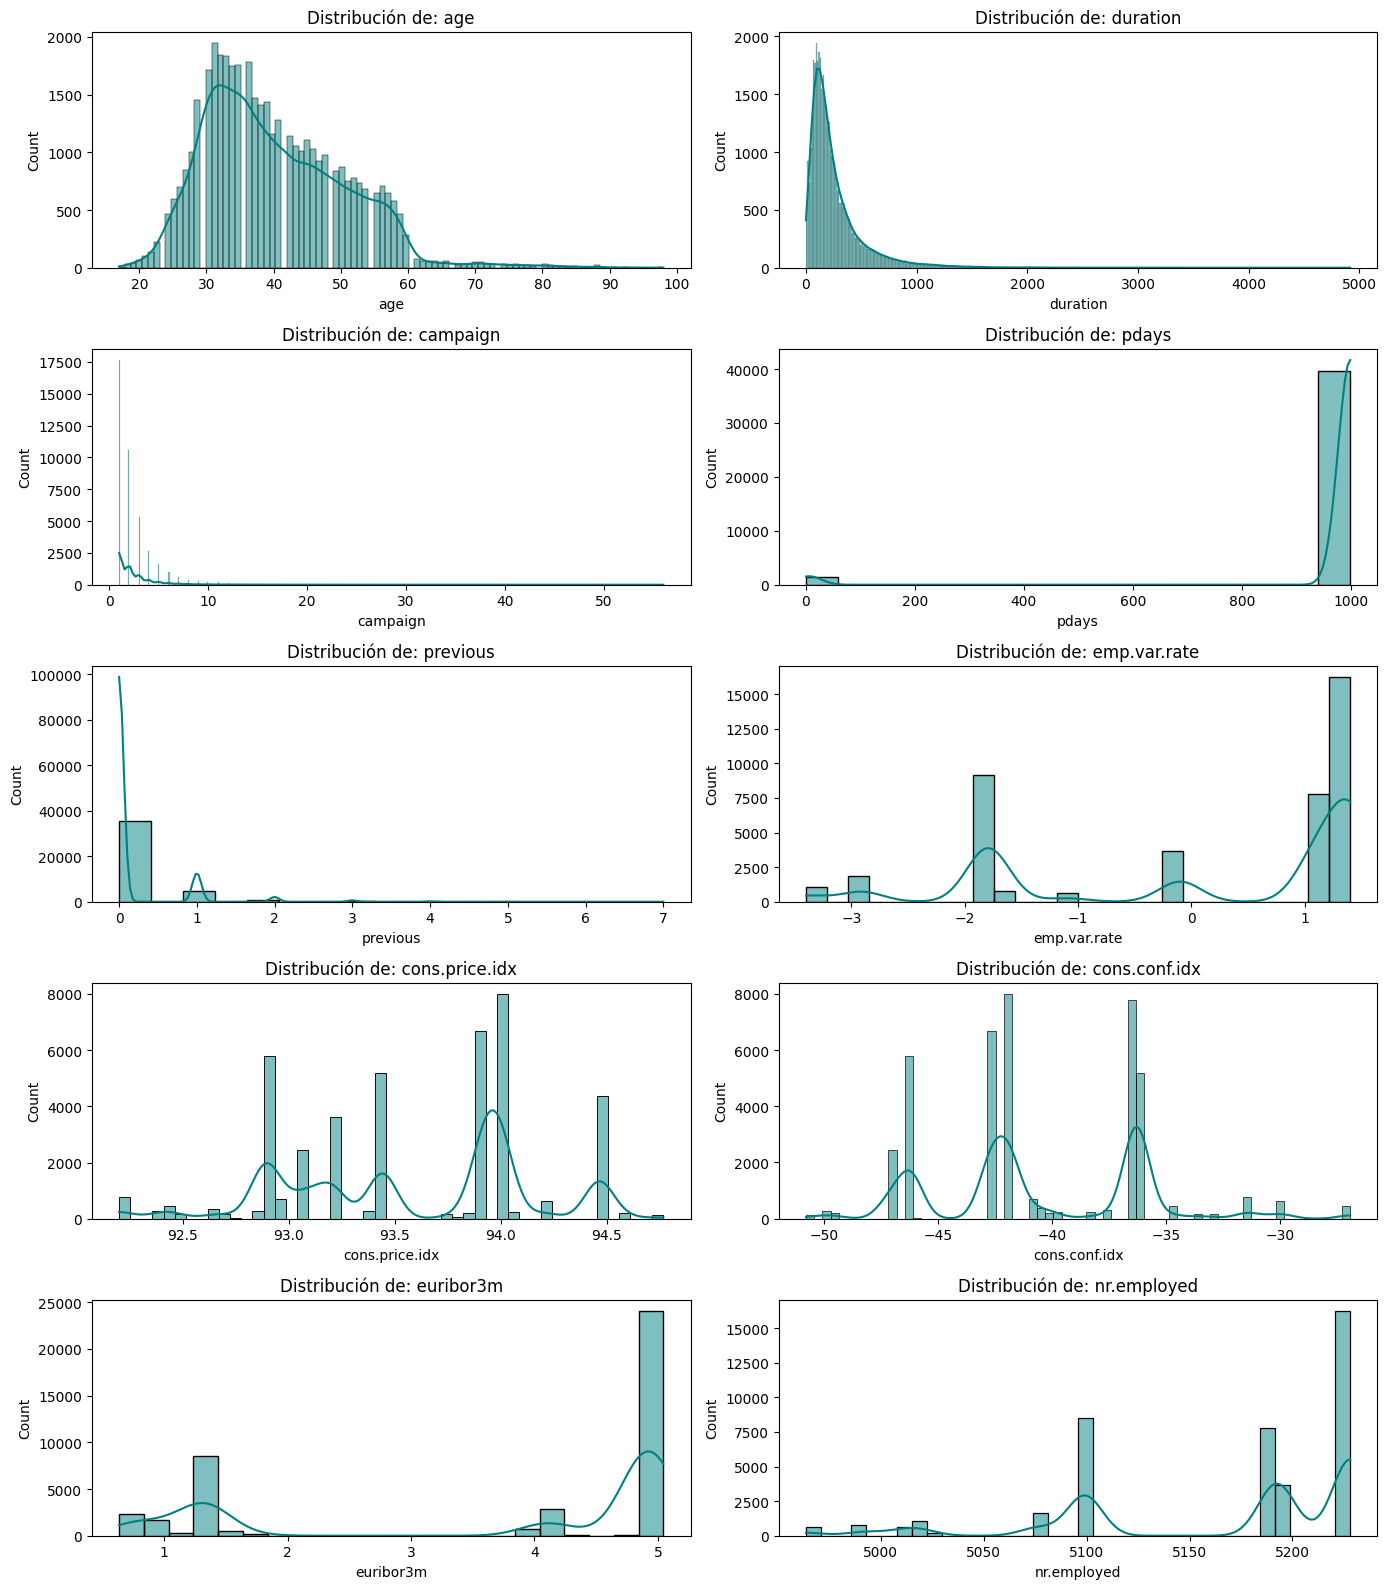

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Dividir numéricas y categóricas
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Graficar todas las variables numéricas
plt.figure(figsize=(14, 16))
plotnum = 1

for col in numerical_cols:
    plt.subplot(5, 2, plotnum)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribución de: {col}')
    plotnum += 1

plt.tight_layout()
plt.show()

### 6.2 Análisis de Variables Categóricas
A continuación se visualiza la frecuencia de cada categoría para las variables categóricas. Este análisis permite conocer mejor la distribución de los clientes según su estado civil, tipo de empleo, nivel educativo, etc.

Esto también ayuda a detectar categorías dominantes o desbalanceadas que pueden influir en el modelado.

- **job**: La mayoría de los clientes están en los sectores de "blue-collar", "admin.", y "technician". Los estudiantes son pocos pero relevantes.
- **marital**: La mayoría están casados. Los solteros y divorciados también son grupos importantes.
- **education**: Alta proporción con estudios básicos y secundarios. Un buen número tiene título universitario.
- **default**: Casi todos los clientes no tienen historial de impago. Pocos casos “yes” o “unknown”.
- **housing** y **loan**: Hay un equilibrio razonable entre quienes tienen préstamos y quienes no.
- **contact**: La mayoría de las campañas se hicieron por celular.
- **month**: Picos importantes en mayo, julio y agosto. Podrían coincidir con campañas intensivas.
- **day_of_week**: Repartido de forma relativamente pareja entre los días laborales.
- **poutcome**: Casi todos los registros tienen "nonexistent" como resultado anterior.
- **y**: Solo un ~11% de los clientes contrataron el producto. Dataset desbalanceado.

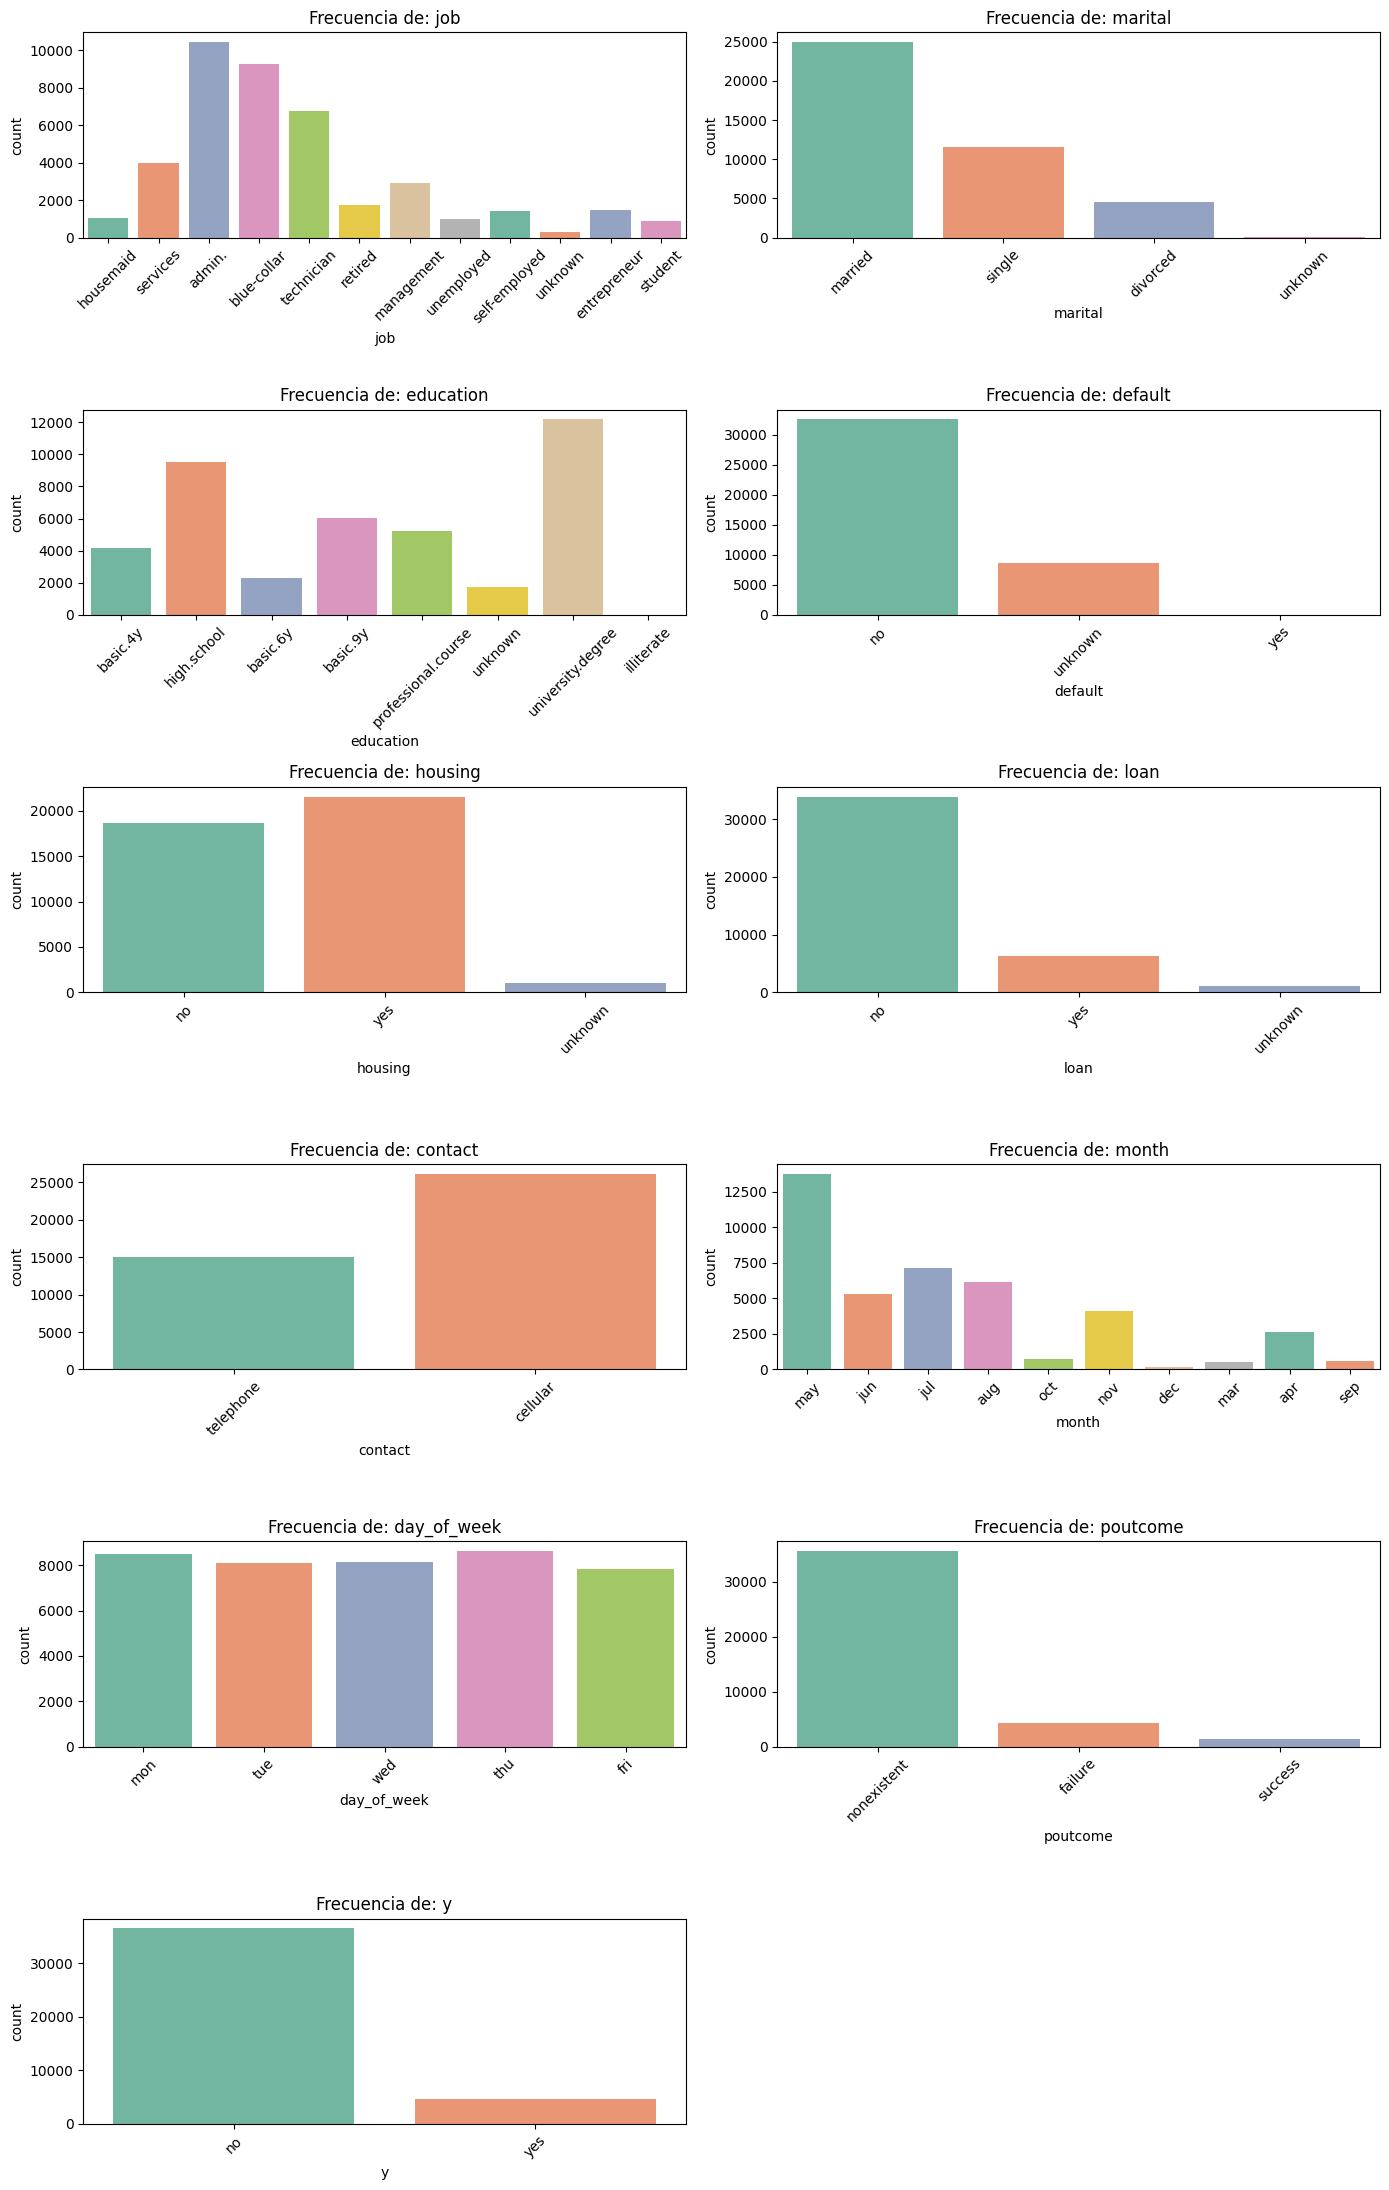

In [8]:
plt.figure(figsize=(14, 22))
plotnum = 1

for col in categorical_cols:
    plt.subplot(6, 2, plotnum)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Frecuencia de: {col}')
    plt.xticks(rotation=45)
    plotnum += 1

plt.tight_layout()
plt.show()

### 6.3 Análisis de variables numéricas y categóricas versus la variable objetivo
Ahora se analiza cómo varían las distribuciones de cada variable en función de la variable objetivo (`y` = yes/no).

Esto permite detectar relaciones directas o indirectas entre cada predictor y la tasa de suscripción.

-  **age**: Clientes muy jóvenes (<25) y mayores (>60) tienen mayor tasa de suscripción.
-  **duration** (NO se debe usar para modelos, pero se ve que tiene relación fuerte con `y`) – cuanto más largo el contacto, más probable que sea exitoso.
-  **pdays**: Cuando es diferente de 999 (es decir, hubo contacto previo), la probabilidad de conversión sube.
-  **previous**: Clientes con contactos previos tienen más probabilidades de decir que sí.
-  **job**: "student", "retired", y "unemployed" muestran tasas más altas de conversión.
-  **marital**: Los solteros y divorciados convierten más que los casados.
-  **education**: Mayor conversión en "university.degree" y "illiterate" (curioso).
-  **housing / loan**: No parecen tener impacto claro en la suscripción.
-  **contact**: Los contactos por celular son mucho más efectivos que por teléfono.
-  **month**: Éxito alto en meses como marzo, septiembre, octubre y diciembre.
-  **poutcome**: Quienes tuvieron campañas anteriores exitosas, tienden a suscribirse.

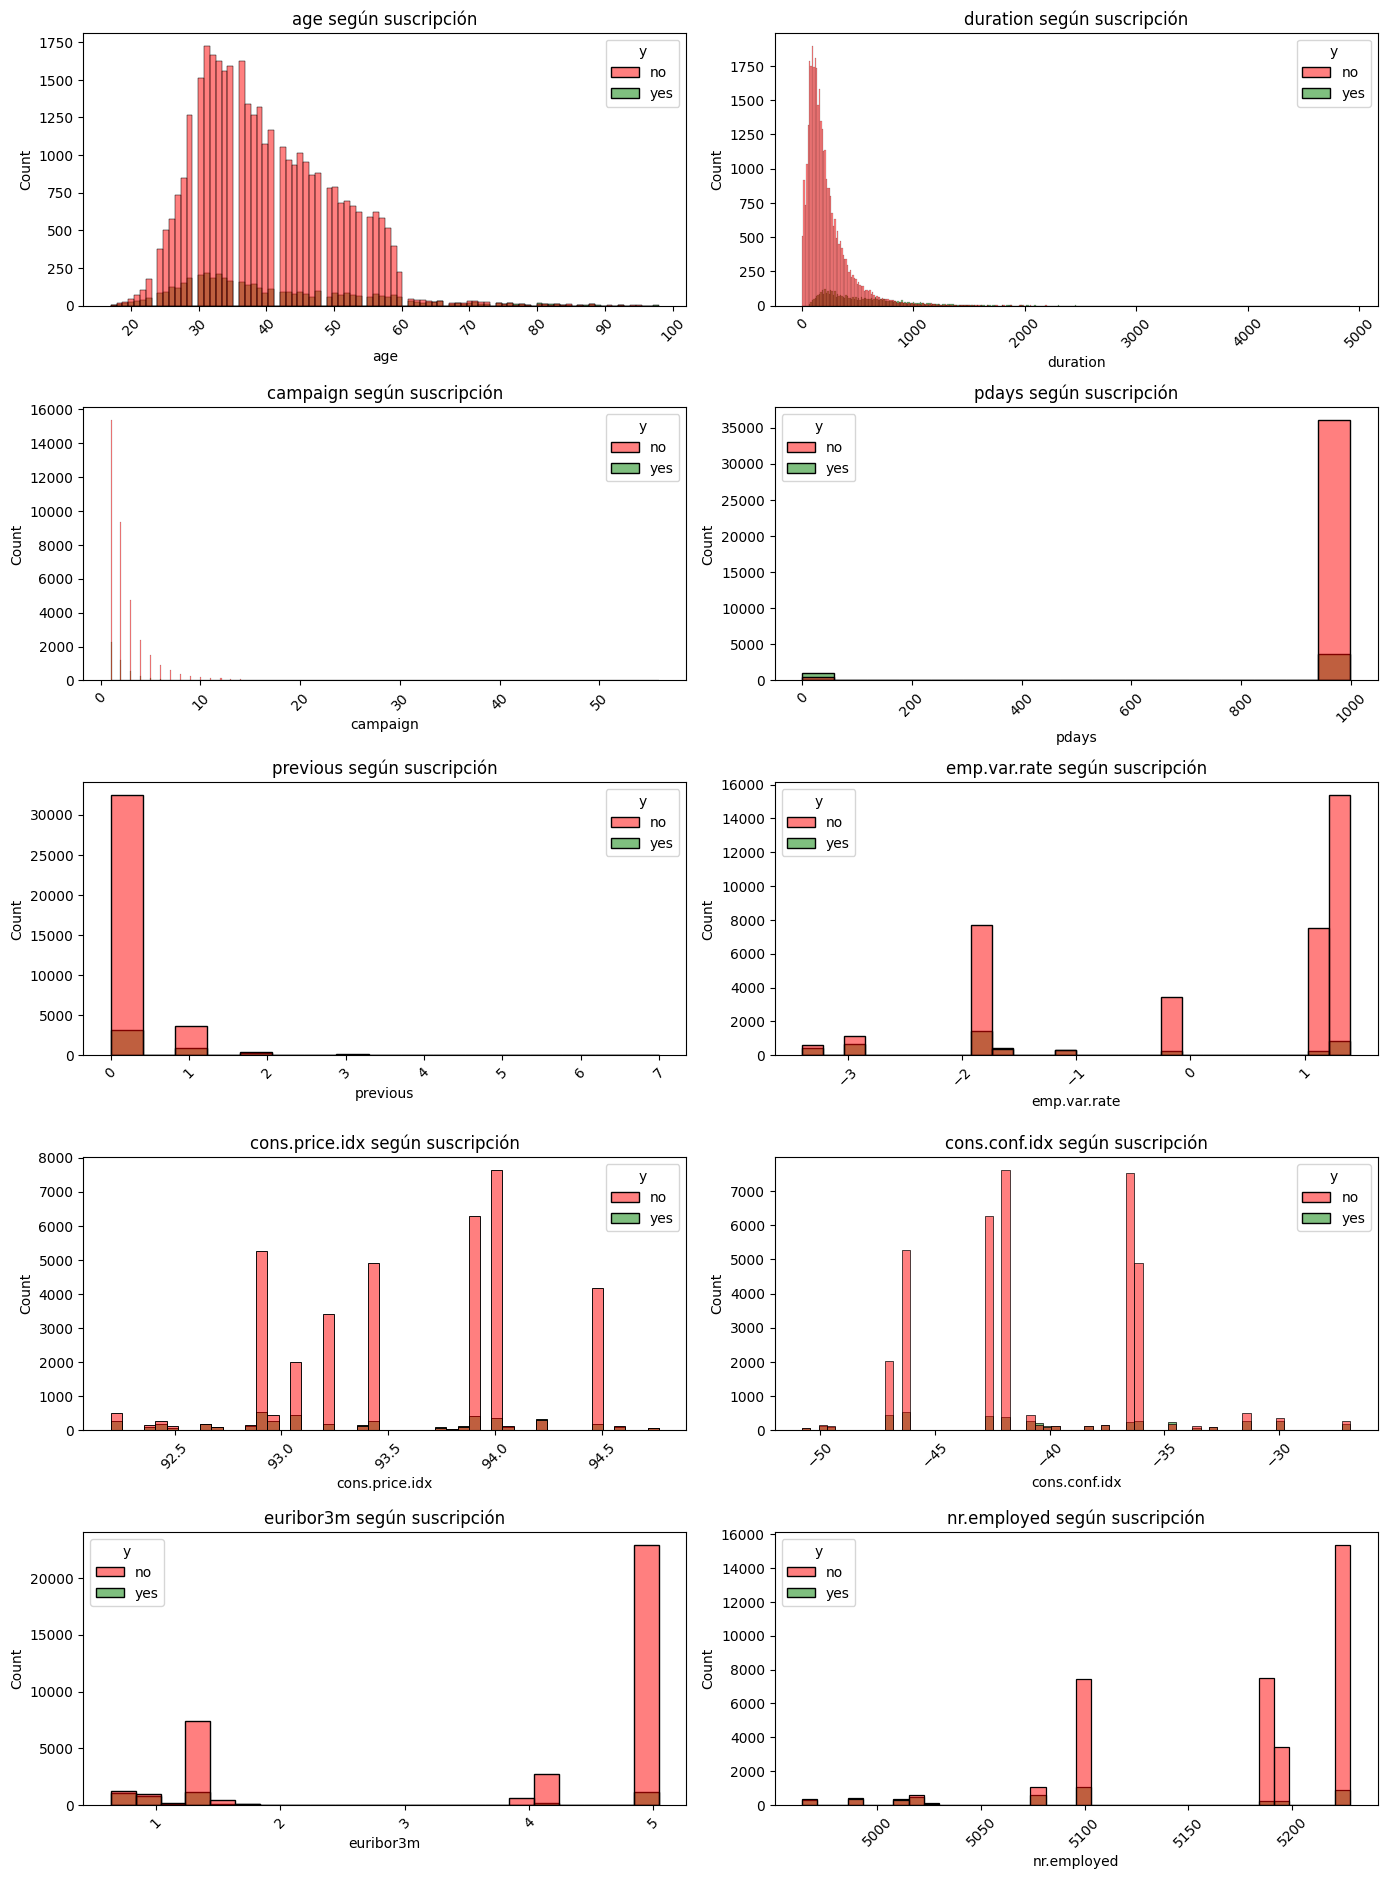

In [9]:
# Numéricas vs target
plt.figure(figsize=(14, 22))
plotnum = 1

for col in numerical_cols:
    plt.subplot(6, 2, plotnum)
    sns.histplot(data=df, x=col, hue='y', palette=['red', 'green'], kde=False)
    plt.title(f'{col} según suscripción')
    plt.xticks(rotation=45)
    plotnum += 1

plt.tight_layout()
plt.show()

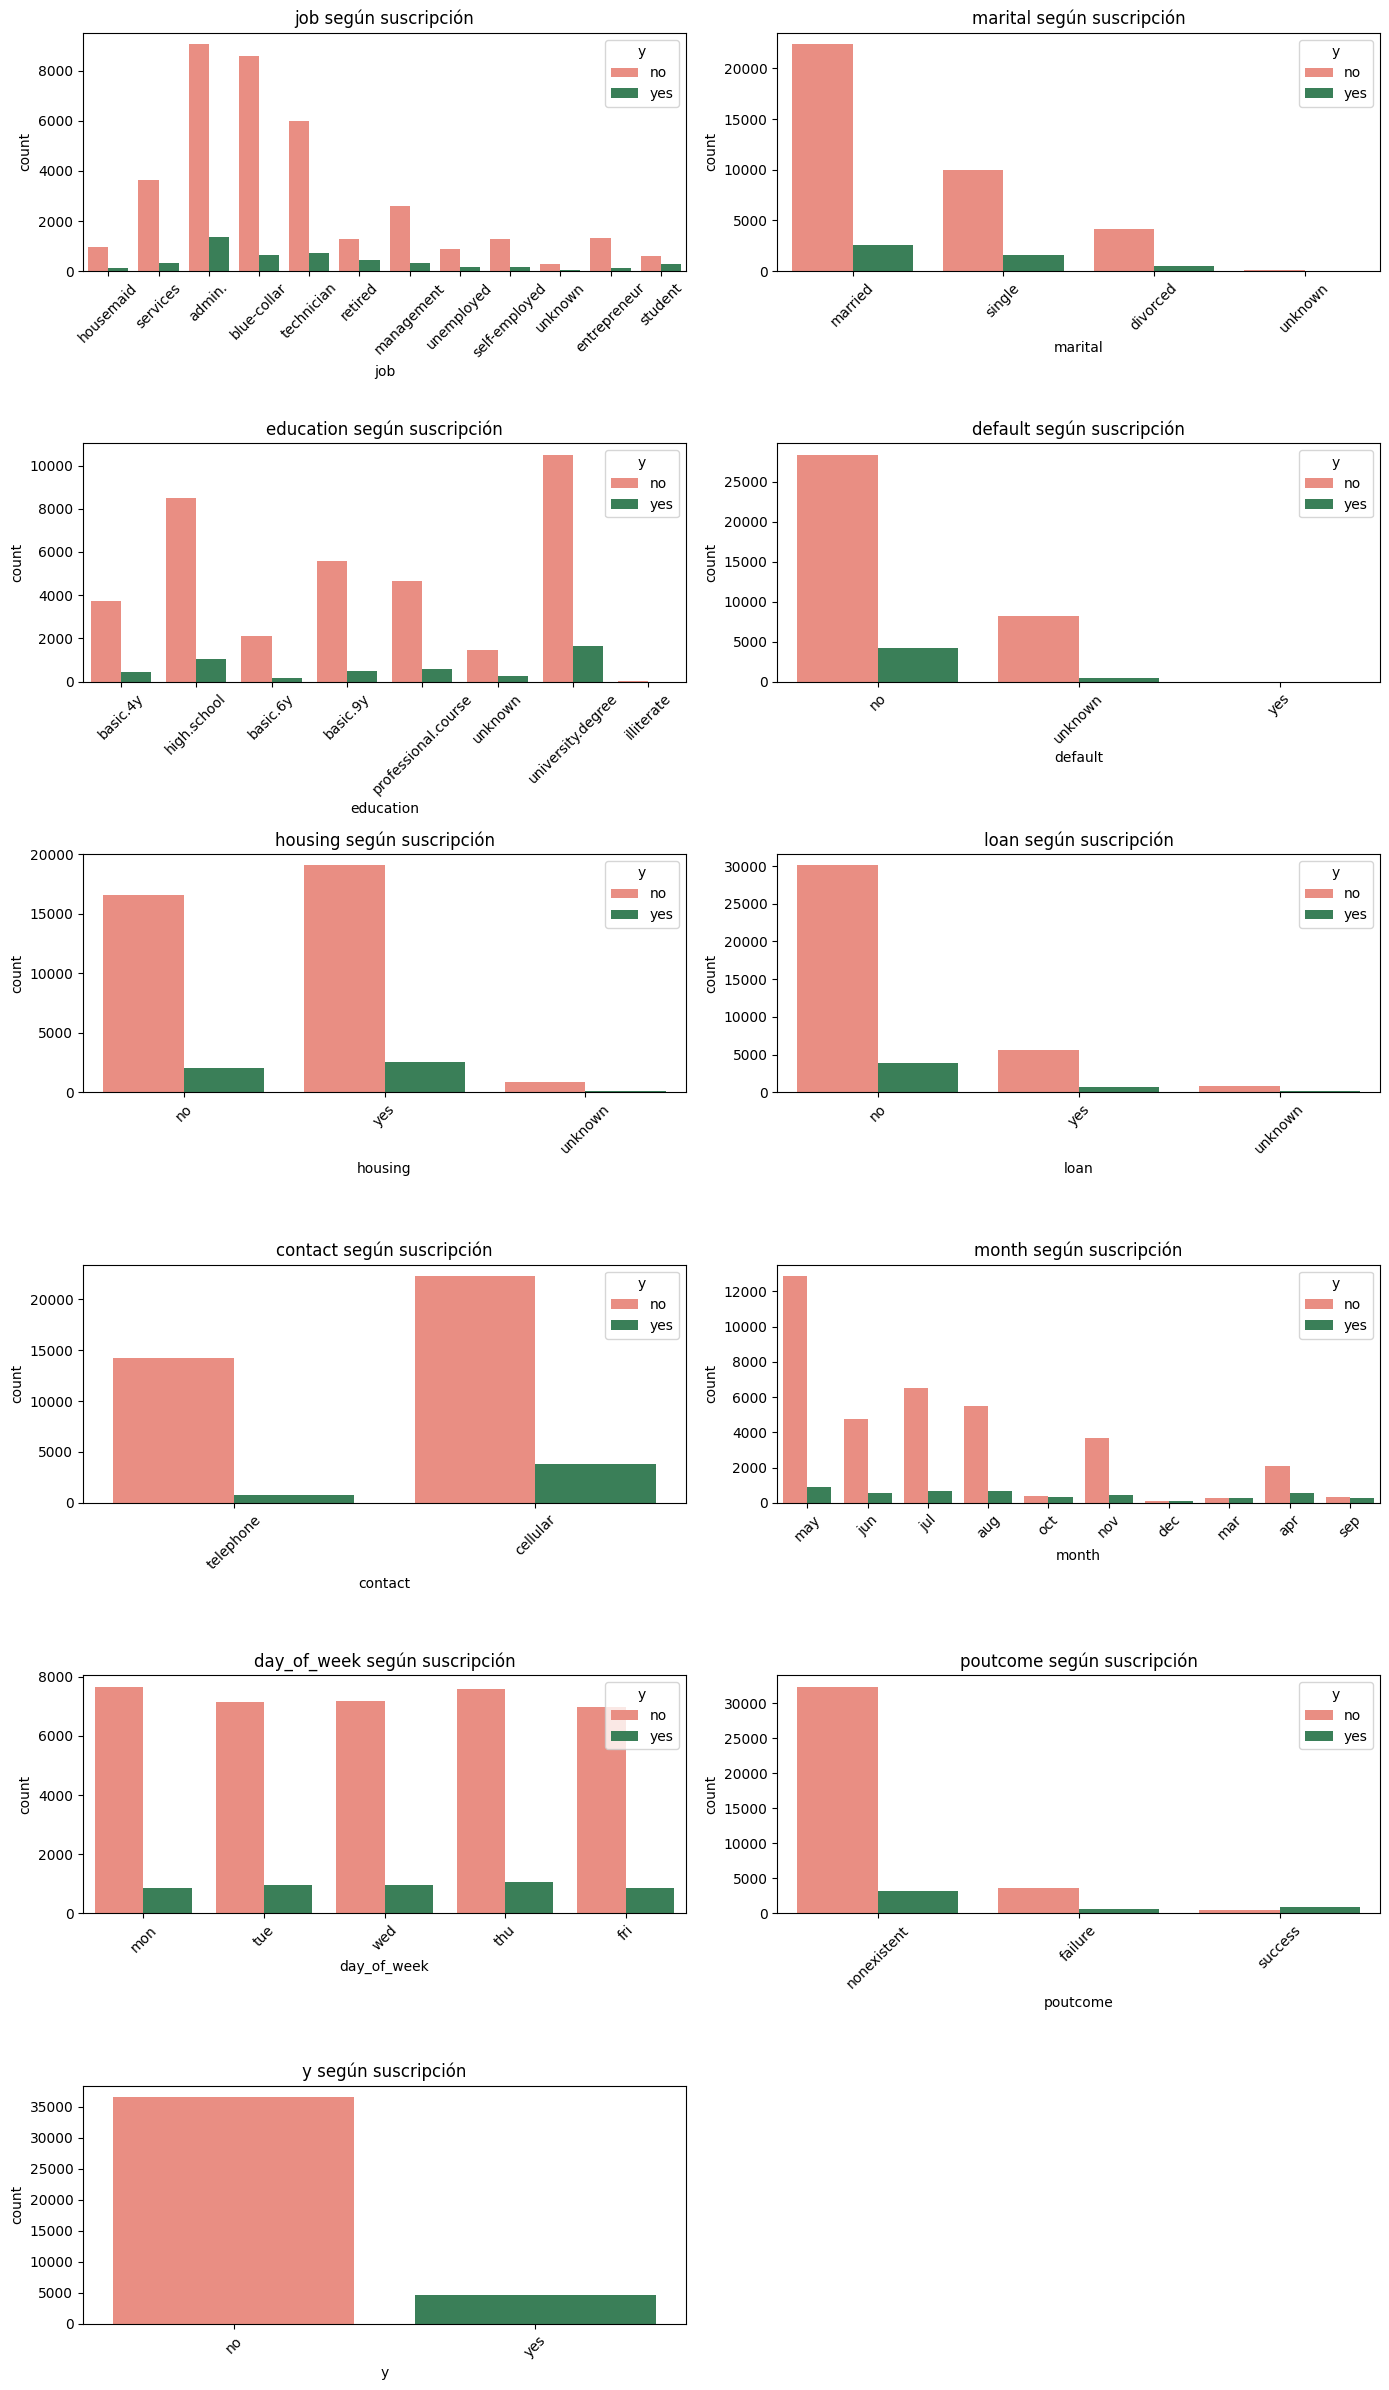

In [10]:
# Categóricas vs target
plt.figure(figsize=(14, 24))
plotnum = 1

for col in categorical_cols:
    plt.subplot(6, 2, plotnum)
    sns.countplot(data=df, x=col, hue='y', palette=['salmon', 'seagreen'])
    plt.title(f'{col} según suscripción')
    plt.xticks(rotation=45)
    plotnum += 1

plt.tight_layout()
plt.show()


### 7. PCA (Análisis de Componentes Principales)
- Reduce la dimensionalidad a 2 dimensiones, para graficar puntos.
   - Componente 1: la dirección en el espacio de datos en la que los puntos varían más (máxima varianza). Está fuertemente asociado a variables económicas como la tasa de interés, el empleo y el índice de precios 
   - Componente 2: es la dirección ortogonal a la primera, que explica la segunda mayor varianza.
- Sirve para graficar la distribución de tus clientes y colorear según y.
- El gráfico muestra la distribución de los clientes proyectada en las dos primeras componentes principales del PCA.
- Cada punto representa un cliente. El color indica si suscribió (`1`, rojo) o no (`0`, azul) al depósito.
- Se observa una **agrupación clara hacia la derecha**, donde predominan los clientes que **no suscribieron** (color azul intenso). Esto sugiere un patrón económico dominante asociado a la no conversión.
- En la zona izquierda e inferior, se concentran más clientes que **sí suscribieron** (`y=1`), aunque todavía están mezclados con muchos que no.
- Esto indica que, aunque hay cierto **patrón latente en los datos**, **no existe una separación lineal clara** entre las clases con solo dos componentes.
- Las variables que más influencian la proyección son: **euribor3m**, **emp.var.rate**, **nr.employed** y **cons.price.idx**, lo que confirma que las condiciones económicas generales del mercado son fuertes determinantes del comportamiento del cliente.

🧠 Conclusión: el PCA muestra que existe cierta estructura latente útil para modelos de clasificación, pero no es suficiente por sí solo para separar perfectamente las clases. Aun así, aporta valor para clustering o visualizaciones estratégicas.

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Armo mi dataframe de escalado y categorizado (one hot)
# Separar columnas categóricas y numéricas
cat_cols = df.select_dtypes(include='object').drop(columns='y').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Escalar variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])
df_scaled = pd.DataFrame(X_scaled, columns=num_cols)

# Codificar variables categóricas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(df[cat_cols])
encoded_col_names = encoder.get_feature_names_out(cat_cols)
df_encoded = pd.DataFrame(X_encoded, columns=encoded_col_names)

# Combinar todo
df_features = pd.concat([df_scaled, df_encoded], axis=1)

# Agregar la variable objetivo como columna aparte
df_features['y'] = df['y']
# Convertir y a binaria
df_features['y_bin'] = df_features['y'].map({'no': 0, 'yes': 1})

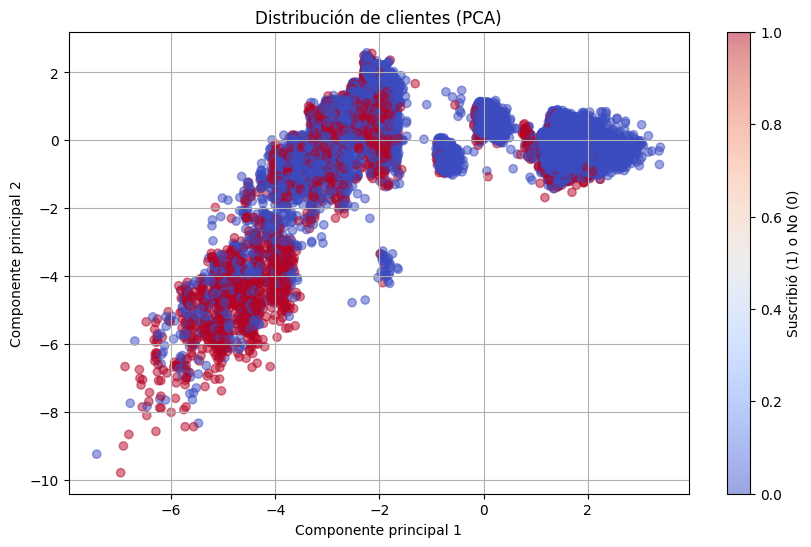

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_features.drop(columns=['y', 'y_bin']))

# Visualización PCA
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_features['y_bin'], cmap='coolwarm', alpha=0.5)
plt.title('Distribución de clientes (PCA)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Suscribió (1) o No (0)')
plt.grid(True)
plt.show()

In [14]:
# Mostrar cuánta varianza explica cada componente
print("🔍 Varianza explicada por cada componente:", pca.explained_variance_ratio_)

# Mostrar cargas (importancia) de cada variable original en el primer componente
loadings = pd.Series(pca.components_[0], index=df_features.drop(columns=['y', 'y_bin']).columns)
print("\n🔎 Contribución de las variables a la primera componente:")
print(loadings.sort_values(ascending=False).head(10))


🔍 Varianza explicada por cada componente: [0.26303446 0.09167594]

🔎 Contribución de las variables a la primera componente:
euribor3m               0.474219
emp.var.rate            0.471998
nr.employed             0.451640
cons.price.idx          0.362964
pdays                   0.219251
contact_telephone       0.113103
poutcome_nonexistent    0.106524
cons.conf.idx           0.103478
campaign                0.096786
month_jul               0.050922
dtype: float64


### 8. Agrupamiento KMeans sobre PCA
Se aplicó el algoritmo **KMeans (2 clusters)** sobre el espacio bidimensional generado por PCA, utilizando las dos primeras componentes principales.

#### 🧠 ¿Qué representan los ejes?

- **Componente 1** (eje X) y **Componente 2** (eje Y) son nuevas variables que capturan la mayor parte de la variabilidad de los datos originales.  
- Están construidas como combinaciones lineales de variables como:  
  `euribor3m`, `emp.var.rate`, `nr.employed`, `cons.price.idx`, etc.
- Estas variables son fuertemente económicas, por lo que los ejes reflejan **condiciones macroeconómicas del cliente**.

#### 🧭 ¿Qué representa el punto (0, 0)?

- El punto (0, 0) en el gráfico representa el **centro del nuevo espacio PCA**, es decir, **un cliente con características promedio**.
- Clientes ubicados cerca de (0, 0) no tienen valores extremos en ninguna dirección económica ni demográfica.
- Clientes muy alejados de ese punto poseen combinaciones inusuales o extremas de características (por ejemplo, tasa de interés muy baja o muchos contactos previos).

#### 🔍 Sobre los clusters:

- El **Cluster 0** (gris) agrupa a la mayoría de los clientes y se ubica mayormente a la izquierda, asociado a condiciones económicas menos favorables.
- El **Cluster 1** (verde) se concentra a la derecha del gráfico, indicando clientes con mejor situación económica según las variables que dominan la Componente 1.
- La separación es bastante clara visualmente, lo que sugiere que **el modelo logra identificar dos segmentos diferenciados**.

🧠 **Conclusión general**:
> Aunque este análisis es no supervisado (sin usar la variable `y`), permite identificar grupos latentes de clientes que comparten patrones similares en sus características.  
> Puede ser muy útil para segmentación, personalización de campañas o como feature adicional en modelos supervisados.

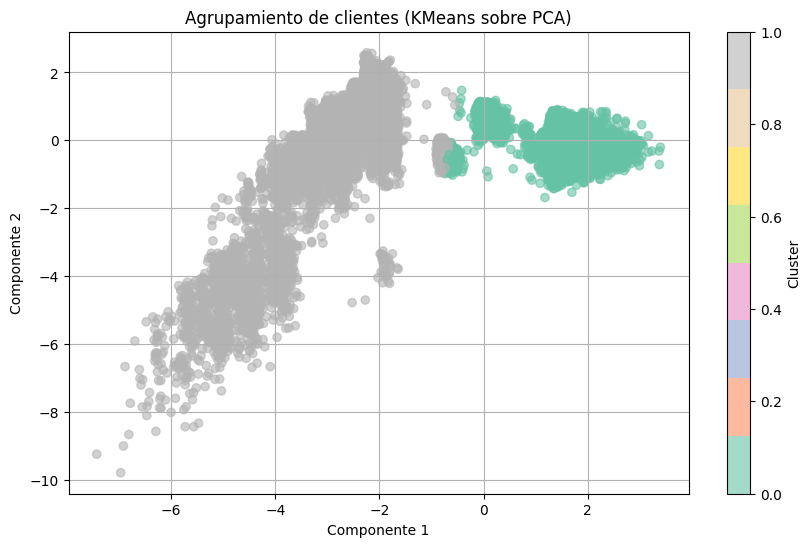

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar KMeans sobre los datos proyectados por PCA
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)  # ya habías generado X_pca anteriormente

# Visualización del clustering
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2', alpha=0.6)
plt.title('Agrupamiento de clientes (KMeans sobre PCA)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()